In [1]:
import os

os.chdir(r'G:\pycharm-workspace\2018ATEC\data')

In [4]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.set_option('display.max_columns', 350)
pd.options.display.float_format = '{:.4f}'.format

anti_fraud_dataframe = pd.read_csv("atec_anti_fraud_train.csv")
anti_fraud_dataframe = anti_fraud_dataframe.reindex(
    np.random.permutation(anti_fraud_dataframe.index))
anti_fraud_dataframe

,id,label,date,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297
373591,59103f4be118ed9abdb4f0008b272cfcfa51d11aad2f45...,0,20171024,0,0,0,0,100805.0000,0,6,1,0,0,1,1,1,1,1,2,1,2,1,31.0000,51.0000,118.0000,186.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,nan,nan,nan,nan,2.0000,1.0000,2.0000,1.0000,2.0000,3.0000,3.0000,4.0000,3.0000,3.0000,1.0000,1.0000,nan,nan,nan,nan,0.0000,1.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,95.0000,35.0000,301.0000,252.0000,301.0000,302.0000,301.0000,301.0000,26.0000,40.0000,26.0000,41.0000,5.0000,4.0000,4.0000,8.0000,27.0000,41.0000,8329.3000,69365.4000,116124.2000,17551.8000,49974.0000,2.0000,1.0000,2.0000,1.0000,2.0000,1.0000,2.0000,1.0000,2.0000,2.0000,2.0000,5.0000,9.0000,13.0000,26.0000,7.0000,14.0000,27.0000,41.0000,76.0000,7.0000,14.0000,26.0000,42.0000,205.0000,204.0000,168.0000,203.0000,204.0000,204.0000,205.0000,205.0000,204.0000,168.0000,204.0000,203.0000,33.0000,34.0000,30.0000,30.0000,29.0000,29.0000,32.0000,83.0000,40.0000,41.0000,40.0000,65.0000,32.0000,31.0000,29.0000,30.0000,30.0000,30.0000,31.0000,242.0000,242.0000,121.0000,138.0000,139.0000,139.0000,242.0000,204.0000,205.0000,168.0000,203.0000,204.0000,301.0000,2.0000,2.0000,1.0000,1.0000,2.0000,2.0000,1.0000,2.0000,1.0000,1.0000,2.0000,1.0000,2.0000,2.0000,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,2.0000,2.0000,2.0000,1.0000,2.0000,2.0000,1.0000,2.0000,2.0000,1.0000,3.0000,2.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,1.0000,2.0000,1.0000,2.0000,2.0000,1.0000,2.0000,2.0000,2.0000,1.0000,1.0000,5.0000,4.0000,8.0000,14.0000,27.0000,42.0000,77.0000,2.0000,1.0000,2.0000,2.0000,5.0000,4.0000,5.0000,4.0000,1.0000,2.0000,1.0000,1.0000,2.0000,1.0000,2.0000,2.0000,2.0000,1.0000,2.0000,1.0000,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,5.0000,4.0000,4.0000,4.0000,4.0000,2.0000,2.0000,1.0000,1.0000,2.0000,1.0000,2.0000,1.0000,2.0000,1.0000,1.0000,1.0000,2.0000,1.0000,2.0000,2.0000,1.0000,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,23.0000,106.0000,302.0000,393.0000,761.0000,16.0000,32.0000,107.0000,137.0000,147.0000,301.0000,302.0000,306.0000,51.0000,169.0000,173.0000,174.0000,175.0000,39.0000,95.0000
936949,a45d15591cb20e4486146383f6de68d71bc61633f02dd8...,0,20170909,1,0,0,1,100804.0000,0,5,2,0,1,1,1,2,2,2,1,2,2,2,5.0000,4.0000,15.0000,16.0000,0.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,2.0000,1.0000,1.0000,1.0000,2.0000,2.0000,1.0000,1.0000,1.0000,2.0000,46.0000,46.0000,302.0000,301.0000,302.0000,302.0

In [21]:
def preprocess_features(anti_fraud_dataframe):
    selected_feature = anti_fraud_dataframe[
        ["f28", 
         "f29", 
         "f30", 
         "f31", 
         "f52", 
         "f53", 
         "f111", 
         "f112"]]
    processed_features = selected_feature.copy()
    processed_features = processed_features.fillna(-1)
    return processed_features

preprocess_features(anti_fraud_dataframe)

,f28,f29,f30,f31,f52,f53,f111,f112
373591,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,205.0000,204.0000
936949,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,196.0000,195.0000
281969,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
607000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,213.0000,214.0000
15897,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,1.0000
...,...,...,...,...,...,...,...,...
602291,-1.0000,-1.0000,-1.0000,-1.0000,0.0000,0.0000,213.0000,214.0000
38116,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000
481370,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000
724622,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,145.0000,146.0000


In [22]:
def preprocess_targets(anti_fraud_dataframe):
    output_targets = pd.DataFrame()
    output_targets["label"] = anti_fraud_dataframe["label"]
    return output_targets

preprocess_targets(anti_fraud_dataframe)

,label
373591,0
936949,0
281969,0
607000,0
15897,0
...,...
602291,0
38116,0
481370,0
724622,0


In [23]:
training_examples = preprocess_features(anti_fraud_dataframe.head(696312))
training_targets = preprocess_targets(anti_fraud_dataframe.head(696312))

validation_examples = preprocess_features(anti_fraud_dataframe.tail(298419))
validation_targets = preprocess_targets(anti_fraud_dataframe.tail(298419))

print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,f28,f29,f30,f31,f52,f53,f111,f112
count,696312.0000,696312.0000,696312.0000,696312.0000,696312.0000,696312.0000,696312.0000,696312.0000
mean,0.1952,0.1972,0.2052,0.2059,0.2582,0.2722,70.7473,70.7511
std,0.7733,0.7750,0.8465,0.8539,0.9368,0.9722,96.0265,96.0262
min,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000
75%,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,192.0000,192.0000
max,13.0000,13.0000,25.0000,29.0000,31.0000,56.0000,252.0000,252.0000


Validation examples summary:


,f28,f29,f30,f31,f52,f53,f111,f112
count,298419.0000,298419.0000,298419.0000,298419.0000,298419.0000,298419.0000,298419.0000,298419.0000
mean,0.1942,0.1949,0.2031,0.2034,0.2556,0.2699,70.7267,70.7306
std,0.7738,0.7749,0.8434,0.8482,0.9310,0.9775,96.0210,96.0179
min,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000
75%,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,192.0000,192.0000
max,11.0000,12.0000,25.0000,28.0000,31.0000,56.0000,251.0000,252.0000


Training targets summary:


,label
count,696312.0000
mean,0.0074
std,0.1301
min,-1.0000
25%,0.0000
50%,0.0000
75%,0.0000
max,1.0000


Validation targets summary:


,label
count,298419.0000
mean,0.0075
std,0.1296
min,-1.0000
25%,0.0000
50%,0.0000
75%,0.0000
max,1.0000


In [24]:
def construct_feature_columns(input_features):
    return set([tf.feature_column.numeric_column(my_feature)
               for my_feature in input_features])
construct_feature_columns(training_examples)

{_NumericColumn(key='f111', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='f112', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='f28', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='f29', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='f30', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='f31', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='f52', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='f53', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)}

In [25]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    ds = Dataset.from_tensor_slices((features,targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    if shuffle:
        ds = ds.shuffle(10000)
    
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

my_input_fn(training_examples, 
            training_targets["label"], 
            batch_size=100)

({'f111': <tf.Tensor 'IteratorGetNext_1:0' shape=(?,) dtype=float64>,
  'f112': <tf.Tensor 'IteratorGetNext_1:1' shape=(?,) dtype=float64>,
  'f28': <tf.Tensor 'IteratorGetNext_1:2' shape=(?,) dtype=float64>,
  'f29': <tf.Tensor 'IteratorGetNext_1:3' shape=(?,) dtype=float64>,
  'f30': <tf.Tensor 'IteratorGetNext_1:4' shape=(?,) dtype=float64>,
  'f31': <tf.Tensor 'IteratorGetNext_1:5' shape=(?,) dtype=float64>,
  'f52': <tf.Tensor 'IteratorGetNext_1:6' shape=(?,) dtype=float64>,
  'f53': <tf.Tensor 'IteratorGetNext_1:7' shape=(?,) dtype=float64>},
 <tf.Tensor 'IteratorGetNext_1:8' shape=(?,) dtype=int64>)

In [26]:
def train_nn_regression_model(
    learning_rate,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    
    periods = 10
    steps_per_period = steps / periods
    
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    dnn_regressor = tf.estimator.DNNRegressor(
        feature_columns=construct_feature_columns(training_examples),
        hidden_units=hidden_units
    )
    
    training_input_fn = lambda: my_input_fn(training_examples, 
                                            training_targets["label"], 
                                            batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                    training_targets["label"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                      validation_targets["label"], 
                                                      num_epochs=1, 
                                                      shuffle=False)
    
    print("Training model...")
    print("RMSE (on training data):")
    training_rmse = []
    validation_rmse = []
    for period in range (0, periods):
        dnn_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
        training_predictions = dnn_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])

        validation_predictions = dnn_regressor.predict(input_fn=predict_validation_input_fn)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])

        training_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(validation_predictions, validation_targets))
        print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print("Model training finished.")
    
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    plt.legend()

    print("Final RMSE (on training data):   %0.2f" % training_root_mean_squared_error)
    print("Final RMSE (on validation data): %0.2f" % validation_root_mean_squared_error)

    return dnn_regressor

Training model...
RMSE (on training data):
  period 00 : 0.21
  period 01 : 0.16
  period 02 : 0.18
  period 03 : 0.15
  period 04 : 0.15
  period 05 : 0.16
  period 06 : 0.15
  period 07 : 0.14
  period 08 : 0.14
  period 09 : 0.14
Model training finished.
Final RMSE (on training data):   0.14
Final RMSE (on validation data): 0.14


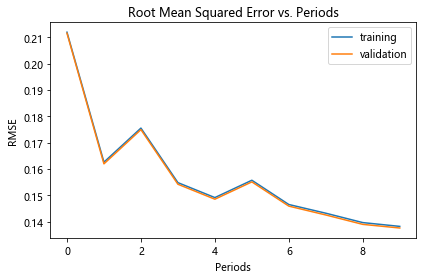

In [27]:
dnn_regressor = train_nn_regression_model(
    learning_rate=0.001,
    steps=2000,
    batch_size=100,
    hidden_units=[10, 10],
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

In [31]:
anti_fraud_dataframe_test_data = pd.read_csv("atec_anti_fraud_test_a.csv")
display.display(anti_fraud_dataframe_test_data.describe())

,date,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297
count,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,368604.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,370795.0000,370795.0000,370795.0000,370795.0000,370762.0000,370762.0000,370762.0000,370762.0000,369086.0000,369086.0000,369086.0000,369086.0000,318197.0000,318197.0000,318197.0000,318197.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,318532.0000,318532.0000,318532.0000,318532.0000,370795.0000,370795.0000,318532.0000,318532.0000,318532.0000,318532.0000,318532.0000,318532.0000,318532.0000,318532.0000,318532.0000,318532.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,178207.0000,178207.0000,178207.0000,178207.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,173244.0000,173244.0000,173244.0000,173244.0000,173244.0000,178207.0000,178207.0000,178207.0000,178207.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,178207.0000,178207.0000,178207.0000,178207.0000,178207.0000,178207.0000,489964.0000,489964.0000,489964.0000,489964.0000,489964.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,489964.0000,489964.0000,489964.0000,489964.0000,489964.0000,489964.0000,489964.0000,489964.

In [37]:
anti_fraud_dataframe_test_data['label'] = 0.0
test_examples = preprocess_features(anti_fraud_dataframe_test_data)

print("Test examples summary:")
display.display(test_examples.describe())

test_targets = pd.DataFrame()
test_targets["score"] = (anti_fraud_dataframe_test_data["label"])
display.display(test_targets.describe())

Test examples summary:


,f28,f29,f30,f31,f52,f53,f111,f112
count,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000
mean,0.1255,0.1258,0.1249,0.1271,0.1297,0.1329,5.7558,5.7621
std,0.7800,0.7804,0.7797,0.7811,0.7776,0.7796,33.9282,33.9297
min,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
75%,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
max,1.0000,4.0000,1.0000,5.0000,1.0000,3.0000,243.0000,243.0000


,score
count,491668.0000
mean,0.0000
std,0.0000
min,0.0000
25%,0.0000
50%,0.0000
75%,0.0000
max,0.0000


In [38]:
predict_testing_input_fn = lambda: my_input_fn(test_examples, 
                                               test_targets["score"], 
                                               num_epochs=1, 
                                               shuffle=False)

In [39]:
test_predictions = dnn_regressor.predict(input_fn=predict_testing_input_fn)
test_predictions = np.array([item['predictions'][0] for item in test_predictions])
display.display(test_predictions, len(test_predictions))

predictions = pd.DataFrame()
predictions['score'] = pd.Series(test_predictions)
predictions['score']

array([ 0.03386153, -0.02021485, -0.02896093, ..., -0.11790048,
       -0.01210292,  0.00751977], dtype=float32)

In [66]:
result = pd.concat([anti_fraud_dataframe_test_data["id"], predictions['score']], axis=1)
result.describe()

,score
count,491668.0000
mean,0.0043
std,0.0305
min,-0.4636
25%,-0.0150
50%,0.0036
75%,0.0309
max,0.3900


In [67]:
result[["id", "score"]].to_csv('submission.csv', index=False)